In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data ="C:\\Users\\kritesh\\Desktop\\Upgrad_Assignment"

In [3]:
os.chdir(data)

In [4]:
#Reading the rounds2 file data
rounds2 = pd.read_csv("rounds2.csv" , sep = "," , header = 0 , encoding = "latin")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#Reading the companies file data
companies = pd.read_csv("companies.txt" , sep = "\t" , header = 0 , encoding = "latin")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


# Checkpoint 1 : Data Cleaning 1

In [6]:
#Unique companies in companies table
len(companies['permalink'].str.lower().unique().tolist())

66368

In [7]:
#Unique companies in rounds2 table
len(rounds2['company_permalink'].str.lower().unique().tolist())

66370

In [8]:
#Merging both companies and rounds2 table to create a master_frame
master_frame = rounds2.merge(companies,left_on = rounds2['company_permalink'].str.lower(), right_on = companies['permalink'].str.lower(),how = 'outer')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [9]:
#No: of observations and variables in master_frame
master_frame.shape

(114954, 16)

In [10]:
#To check how many rows have all missing values in master_frame
master_frame.isnull().all(axis=1).sum()

0

In [11]:
#Removing rows which are having more than 5 missing values since such observations are anyway unlikely to contribute to prediction of raised amount.
len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

5074

In [12]:
# calculate the percentage
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

4.413939488839014

In [13]:
# retaining the rows having <= 5 missing values
master_frame = master_frame[master_frame.isnull().sum(axis=1) <= 5]

In [14]:
#Checking the percentage of missing value in each column. Here we can't remove any columns as mentioned in Checkpoint 1.
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.07
funded_at                   0.00
raised_amount_usd          15.66
permalink                   0.00
name                        0.00
homepage_url                4.13
category_list               1.58
status                      0.00
country_code                3.39
state_code                  5.35
region                      4.64
city                        4.64
founded_at                 15.51
dtype: float64

In [15]:
# Checking the summary of the raised amount usd column and we could observed a lot of variation in min,mean and max
master_frame['raised_amount_usd'].describe()

count    9.267800e+04
mean     1.029365e+07
std      1.094360e+08
min      0.000000e+00
25%      3.450000e+05
50%      1.700962e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [16]:
#Since imputing this with mean/median seems quite biased, and so we should remove the missing values in raised amount usd columns
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.88
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.65
category_list               0.64
status                      0.00
country_code                3.88
state_code                  5.74
region                      5.14
city                        5.14
founded_at                 15.07
dtype: float64

# Checkpoint 2: Funding Type Analysis

In [17]:
#Filtering all the venture funding round type
venture_funding_round = master_frame[master_frame['funding_round_type']=='venture']
venture_funding_round

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/Organization/10-Minutes-With,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/Organization/1000Memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


In [18]:
#To check how many missing values/NaN are there in the venture_funding_round dataframe
round(100*(venture_funding_round .isnull().sum()/len(venture_funding_round .index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         43.79
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.44
category_list               0.64
status                      0.00
country_code                2.69
state_code                  4.18
region                      3.88
city                        3.88
founded_at                 17.95
dtype: float64

In [19]:
#Summary statistics of the raised amount column during venture funding round
venture_funding_round['raised_amount_usd'].describe()

count    4.943100e+04
mean     1.173731e+07
std      8.697671e+07
min      0.000000e+00
25%      1.607385e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [20]:
#Calculating the average of the amount raised during the venture funding round 
venture_funding_round['raised_amount_usd'].mean()

11737311.879609961

In [21]:
#Checking the no: of observations and variables 
venture_funding_round.shape

(49431, 16)

In [22]:
#sns.barplot(x='Product_Category', y='Sales', data=df)
#plt.show()

In [23]:
#Filtering all the angel funding round type
angel_funding_round = master_frame[master_frame['funding_round_type']=='angel']
angel_funding_round

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43923865.0,/Organization/1000Chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008
69,/ORGANIZATION/10SECONDS-SOFTWARE,/funding-round/dacf342722793cb7485fbdbd7530461d,angel,NaN,01-07-2010,100000.0,/Organization/10Seconds-Software,10seconds Software,http://www.10secondsSoftware.com,Enterprise Software|Mobility|Software,operating,AUS,2,Sydney,Sydney,01-07-2009
93,/ORGANIZATION/121NEXUS,/funding-round/9df05fa02b09752fcd0ecbf4e167cbef,angel,NaN,22-01-2013,500000.0,/Organization/121Nexus,121nexus,http://www.121nexus.com,Health Diagnostics|Medical Devices|Personaliza...,operating,USA,RI,Providence,Providence,07-10-2011
106,/organization/12return,/funding-round/5002742a51863b56c788a14348c2c03a,angel,NaN,01-06-2012,619494.0,/Organization/12Return,12Return,http://www.12return.com,Consumer Goods|Retail|SaaS|Software,operating,NLD,11,NLD - Other,Gorinchem,10-12-2010
125,/ORGANIZATION/15FIVE,/funding-round/6c390df9112bb5ee560d419450536bd7,angel,NaN,15-01-2013,1000000.0,/Organization/15Five,15Five,http://15five.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-05-2011
126,/organization/15five,/funding-round/e7ce4181f0de392140ff584986340a54,angel,NaN,01-01-2012,200000.0,/Organization/15Five,15Five,http://15five.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-05-2011
130,/organization/169-st,/funding-round/83b14cdf635963a5abc50cdafd9b462d,angel,NaN,01-06-2009,50000.0,/Organization/169-St,169 ST.,http://www.junebugreview.com,Entertainment|Games,closed,USA,FL,Orlando,Lake Mary,15-05-2009
154,/organization/1calendar,/funding-round/539642353b091d79974fef89a7c65df2,angel,NaN,04-04-2008,40000.0,/Organization/1Calendar,1calendar,http://1calendar.com,Advertising|Education|Internet|Mobile,operating,DNK,17,Copenhagen,Copenhagen,19-01-2009
177,/ORGANIZATION/1MPACT-REVOLUTION-POWERING-HELPF...,/funding-round/027c0a116d990577e68b3e5973b7319f,angel,NaN,01-05-2014,221592.0,/Organization/1Mpact-Revolution-Powering-Helpf...,1mpact Revolution - Powering Helpfreely.org,http://www.1mpactrevolution.com,Non Profit|Online Shopping|Social Fundraising,operating,ESP,53,Las Palmas De Gran Canaria,Las Palmas De Gran Canaria,01-09-2013
180,/organization/1mpact-revolution-powering-helpf...,/funding-round/ff727fc589c2cdcc7e39897c370a0658,angel,NaN,01-05-2015,447061.0,/Organization/1Mpact-Revolution-Powering-Helpf...,1mpact Revolution - Powering Helpfreely.org,http://www.1mpactrevolution.com,Non Profit|Online Shopping|Social Fundraising,operating,ESP,53,Las Palmas De Gran Canaria,Las Palmas De Gran Canaria,01-09-2013


In [24]:
#To check how many missing values/NaN are there in the angel_funding_round dataframe
round(100*(angel_funding_round.isnull().sum()/len(angel_funding_round.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         99.64
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                0.80
category_list               0.57
status                      0.00
country_code                6.94
state_code                  9.27
region                      8.14
city                        8.14
founded_at                  5.78
dtype: float64

In [25]:
#Summary statistics of the raised amount column during angel funding round
angel_funding_round['raised_amount_usd'].describe()

count    4.755000e+03
mean     9.539675e+05
std      7.462690e+06
min      0.000000e+00
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [26]:
#Calculating the average of the amount raised during the angel funding round 
angel_funding_round['raised_amount_usd'].mean()

953967.4885383806

In [27]:
#Checking the no: of observations and variables 
angel_funding_round.shape

(4755, 16)

In [28]:
#Filtering all the seed funding round type
seed_funding_round = master_frame[master_frame['funding_round_type']=='seed']
seed_funding_round

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
13,/ORGANIZATION/1,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,NaN,05-02-2014,150000.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
15,/ORGANIZATION/1,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,NaN,20-07-2011,1000050.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
16,/organization/1-2-3-listo,/funding-round/6de4609e894495105bc791ed64361288,seed,NaN,18-02-2013,40000.0,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012
29,/ORGANIZATION/10-MINUTES-WITH,/funding-round/f245a74b4c54610ae843e17bdf4d1113,seed,NaN,01-01-2013,400000.0,/Organization/10-Minutes-With,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
30,/organization/1000-corks,/funding-round/8f4fa70e24269ddd8bdf6658906b356b,seed,NaN,23-08-2011,40000.0,/Organization/1000-Corks,1000 Corks,http://1000corks.com,Search,operating,USA,OR,"Portland, Oregon",Lake Oswego,01-01-2008
31,/ORGANIZATION/1000-MARKETS,/funding-round/ce6749b6441f52ccaf38b6d5578779fd,seed,NaN,15-05-2009,500000.0,/Organization/1000-Markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,acquired,USA,WA,Seattle,Seattle,01-01-2009
35,/ORGANIZATION/1000MEMORIES,/funding-round/f5fb428ed1e63321f88b3e646ba85f00,seed,NaN,01-01-2010,15000.0,/Organization/1000Memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


In [29]:
#To check how many missing values/NaN are there in the seed_funding_round dataframe
round(100*(seed_funding_round.isnull().sum()/len(seed_funding_round.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         99.61
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                1.67
category_list               0.60
status                      0.00
country_code                6.49
state_code                  9.32
region                      8.00
city                        8.00
founded_at                 10.34
dtype: float64

In [30]:
#Summary statistics of the raised amount column during seed funding round
seed_funding_round['raised_amount_usd'].describe()

count    2.269900e+04
mean     7.328270e+05
std      2.248403e+06
min      0.000000e+00
25%      6.337150e+04
50%      3.000000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [31]:
#Calculating the average of the amount raised during the seed funding round 
seed_funding_round['raised_amount_usd'].mean()

732827.0467421472

In [32]:
#Checking the no: of observations and variables
seed_funding_round.shape

(22699, 16)

In [33]:
#Filtering all the private equity funding round type
private_equity_funding = master_frame[master_frame['funding_round_type']=='private_equity']
private_equity_funding

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
21,/ORGANIZATION/1-800-PUBLICRELATIONS-INC-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,/Organization/1-800-Publicrelations-Inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013
153,/ORGANIZATION/1C-COMPANY,/funding-round/679ae989d9dd8195e989dda21eff44b7,private_equity,NaN,03-10-2011,200000000.0,/Organization/1C-Company,1C Company,http://1c.ru/eng,Games|Software|Video Games,closed,RUS,48,Moscow,Moscow,01-01-1991
231,/ORGANIZATION/21ST-CENTURY-ONCOLOGY,/funding-round/261bff457e1b31c4879e786ab7cf80ab,private_equity,NaN,26-09-2014,325000000.0,/Organization/21St-Century-Oncology,21st Century Oncology,http://21stcenturyoncology.com,Health and Wellness,operating,USA,FL,Fort Myers,Fort Myers,NaN
312,/organization/2dheat,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,NaN,24-10-2014,200708.0,/Organization/2Dheat,2DHeat,http://www.2dheat.com/,Clean Technology,operating,GBR,P2,Warrington,Warrington,NaN
326,/organization/2nd-story-software-inc,/funding-round/c7647b519b16454c1abe9f310ea2a34c,private_equity,NaN,30-03-2005,85000000.0,/Organization/2Nd-Story-Software-Inc,"2nd Story Software, Inc.",http://www.taxact.com,Software,acquired,USA,IA,Cedar Rapids,Cedar Rapids,15-02-1998
534,/organization/3power-energy-group,/funding-round/30d107e92eddb3b3791013d29328986d,private_equity,NaN,11-03-2011,50000000.0,/Organization/3Power-Energy-Group,3POWER ENERGY GROUP,http://www.3powerenergy.com,Clean Technology,operating,GBR,K4,Plymouth,Plymouth,NaN
540,/organization/3scale,/funding-round/9e87c098957bd69cc8b5bb544b8cf351,private_equity,NaN,24-04-2013,4200000.0,/Organization/3Scale,3scale,http://www.3scale.net,Developer APIs|Enterprise Software|Infrastruct...,operating,USA,CA,SF Bay Area,San Francisco,01-12-2007
569,/ORGANIZATION/4-33-CREATIVE-LAB,/funding-round/eff7c787489004130d48678f16d9c466,private_equity,NaN,13-11-2014,100000000.0,/Organization/4-33-Creative-Lab,4:33 Creative Lab,http://433.co.kr,Design|Game|Mobile Games,operating,KOR,11,Seoul,Seoul,NaN
623,/ORGANIZATION/4DK-TECHNOLOGIES,/funding-round/4fcba8428540e1f34fb8af1d0393c57e,private_equity,NaN,12-12-2011,3378975.0,/Organization/4Dk-Technologies,4DK Technologies,http://4dk.com,Mobile,acquired,USA,VA,"Washington, D.C.",Herndon,01-01-2005
659,/ORGANIZATION/4TECH,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,NaN,21-12-2011,7000000.0,/Organization/4Tech,4Tech,NaN,Biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011


In [34]:
#To check how many missing values/NaN are there in the private_equity_funding dataframe
round(100*(private_equity_funding.isnull().sum()/len(private_equity_funding.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         99.79
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.99
category_list               0.80
status                      0.00
country_code                2.50
state_code                  4.89
region                      4.41
city                        4.30
founded_at                 16.63
dtype: float64

In [35]:
#Summary statistics of the raised amount column during private equity funding round
private_equity_funding['raised_amount_usd'].describe()

count    1.882000e+03
mean     7.311876e+07
std      1.994126e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [36]:
#Calculating the average of the amount raised during the private equity funding round 
private_equity_funding['raised_amount_usd'].mean()

73118762.63018066

In [37]:
#Checking the no: of observations and variables 
private_equity_funding.shape

(1882, 16)

# Checkpoint 3: Country Analysis

In [38]:
#Since most investments are occuring in the venture funding round therefore we copy all the data into top9 dataframe
top9 = venture_funding_round

In [39]:
#Summary statistics of the raised amount column in the top9 dataframe
top9['raised_amount_usd'].describe()

count    4.943100e+04
mean     1.173731e+07
std      8.697671e+07
min      0.000000e+00
25%      1.607385e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [40]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49431 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          49431 non-null object
funding_round_permalink    49431 non-null object
funding_round_type         49431 non-null object
funding_round_code         27784 non-null object
funded_at                  49431 non-null object
raised_amount_usd          49431 non-null float64
permalink                  49431 non-null object
name                       49431 non-null object
homepage_url               47238 non-null object
category_list              49115 non-null object
status                     49431 non-null object
country_code               48100 non-null object
state_code                 47367 non-null object
region                     47515 non-null object
city                       47515 non-null object
founded_at                 40560 non-null object
dtypes: float64(1), object(15)
memory usage: 6.4+ MB


In [41]:
#Summing up the raised amount during funding based on country wise 
top9 = top9.groupby('country_code', as_index = False).agg({"raised_amount_usd":np.sum})

In [42]:
#Finding the top 9 countries which has received the highest total funding
top9 = top9.sort_values("raised_amount_usd" , ascending = False ).head(9)
top9

,country_code,raised_amount_usd
94,USA,4.225062e+11
15,CHN,3.983542e+10
29,GBR,2.021619e+10
39,IND,1.439186e+10
12,CAN,9.583332e+09
28,FRA,7.259537e+09
42,ISR,6.903915e+09
21,DEU,6.346960e+09
45,JPN,3.363677e+09


In [43]:
#Finding the top three english speaking countries
#Here China - CHN is not a english speaking country as mentioned in the PDF File provided to us during the assignment
top9.sort_values("raised_amount_usd" , ascending = False ).head(4)

,country_code,raised_amount_usd
94,USA,4.225062e+11
15,CHN,3.983542e+10
29,GBR,2.021619e+10
39,IND,1.439186e+10


# Checkpoint 4: Sector Analysis 1

In [44]:
#Reading the mapping file
mapping = pd.read_csv("mapping.csv" , sep = "," , header = 0 , encoding = "latin")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [45]:
#Removing the blanks column from the mapping file as it is irrevalant , Since its not a main sector.
mapping = mapping.drop('Blanks', axis=1)
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,0,0,0,0,0,0,0
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1


In [46]:
#Changing the format of the dataframe from wide format to long format and including all the different sectors under a common sector called main sector
mapping_long_format = pd.melt(mapping,id_vars=['category_list'],var_name = 'main_sector',value_vars = ['Automotive & Sports' , 'Cleantech / Semiconductors' , 'Entertainment' , 'Health' , 'Manufacturing' , 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'])
mapping_long_format

,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [47]:
#Filtering all the sectors under main sector column whose value is 1.
mapping_sector = mapping_long_format[mapping_long_format.value == 1]
mapping_sector

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [48]:
#Renaming the category list column to primary sector
mapping_sector['primary_sector'] = mapping_sector['category_list']
mapping_sector

C:\Users\kritesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category_list,main_sector,value,primary_sector
8,Adventure Travel,Automotive & Sports,1,Adventure Travel
14,Aerospace,Automotive & Sports,1,Aerospace
45,Auto,Automotive & Sports,1,Auto
46,Automated Kiosk,Automotive & Sports,1,Automated Kiosk
47,Automotive,Automotive & Sports,1,Automotive
57,Bicycles,Automotive & Sports,1,Bicycles
69,Boating Industry,Automotive & Sports,1,Boating Industry
87,CAD,Automotive & Sports,1,CAD
93,Cars,Automotive & Sports,1,Cars
188,Design,Automotive & Sports,1,Design


In [49]:
#Removing value and category list column since they are redundant.
mapping_sector = mapping_sector.drop(['value','category_list'], axis=1)
mapping_sector

,main_sector,primary_sector
8,Automotive & Sports,Adventure Travel
14,Automotive & Sports,Aerospace
45,Automotive & Sports,Auto
46,Automotive & Sports,Automated Kiosk
47,Automotive & Sports,Automotive
57,Automotive & Sports,Bicycles
69,Automotive & Sports,Boating Industry
87,Automotive & Sports,CAD
93,Automotive & Sports,Cars
188,Automotive & Sports,Design


In [50]:
#Replacing all the '0' letter in the primary sector with that of 'na'
mapping_sector['primary_sector'] = mapping_sector.primary_sector.apply(lambda x: x.replace("0", "na"))
mapping_sector

,main_sector,primary_sector
8,Automotive & Sports,Adventure Travel
14,Automotive & Sports,Aerospace
45,Automotive & Sports,Auto
46,Automotive & Sports,Automated Kiosk
47,Automotive & Sports,Automotive
57,Automotive & Sports,Bicycles
69,Automotive & Sports,Boating Industry
87,Automotive & Sports,CAD
93,Automotive & Sports,Cars
188,Automotive & Sports,Design


In [51]:
#Adding a new column called primary sector in master frame and inputting in it the category list data. In case the category list is a combination of 
#multiple sub sectors we should chose the first one before the '|' symbol.
master_frame['primary_sector'] = master_frame.category_list.str.split('|').str[0]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [52]:
#merged data frame with each primary sector mapped to its main sector
Final_DF = pd.merge(master_frame,mapping_sector,on='primary_sector')
Final_DF

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/ORGANIZATION/A-DANCE-FOR-ME,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,/Organization/A-Dance-For-Me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment
5,/ORGANIZATION/AKIRA-MOBILE,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.0,/Organization/Akira-Mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,Media,Entertainment
6,/ORGANIZATION/ALL-DAY-MEDIA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2000000.0,/Organization/All-Day-Media,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Media,Entertainment
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
8,/ORGANIZATION/AMERICA-S-REAL-DEAL,/funding-round/5fbb191b97ca9789a7196de703983240,equity_crowdfunding,NaN,19-08-2011,670000.0,/Organization/America-S-Real-Deal,America's Real Deal,http://americasrealdeal.com/,Media|News,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Media,Entertainment
9,/ORGANIZATION/AMERICAN-GNUITY,/funding-round/07cc3eb3afd8ef5812e2b62b254b2040,equity_crowdfunding,NaN,19-08-2011,670000.0,/Organization/American-Gnuity,American Gnuity,http://AmericanGnuity.com,Media|News,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Media,Entertainment


# Checkpoint 5: Sector Analysis 2

In [53]:
#Creating three separate dataframe namely D1 , D2 and D3 for the Three respective countries.
D1 = Final_DF[Final_DF['country_code']=='USA']
D1 = D1[D1['funding_round_type']=='venture']
D1= D1[D1['raised_amount_usd']>=5000000]
D1= D1[D1['raised_amount_usd']<=15000000]
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
31,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/Organization/Chefs-Feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment
63,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/Organization/Huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment
64,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/Organization/Huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment
87,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/Organization/Matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment
90,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,/Organization/Mediabong,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment
99,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,/Organization/Newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment
104,/ORGANIZATION/NOKEENA,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,/Organization/Nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment
106,/ORGANIZATION/NOKEENA,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,/Organization/Nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment
115,/ORGANIZATION/PLUMTV,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,/Organization/Plumtv,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,Media,Entertainment


In [54]:
D2 = Final_DF[Final_DF['country_code']=='GBR']
D2 = D2[D2['funding_round_type']=='venture']
D2= D2[D2['raised_amount_usd']>=5000000]
D2= D2[D2['raised_amount_usd']<=15000000]
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
238,/ORGANIZATION/COMMON-INTEREST-COMMUNITIES,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,/Organization/Common-Interest-Communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,Application Platforms,"News, Search and Messaging"
275,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,/Organization/Geospock-Ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging"
276,/ORGANIZATION/GEOSPOCK-LTD-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,/Organization/Geospock-Ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging"
401,/ORGANIZATION/TAO-GROUP-2,/funding-round/ad088f1deeda09f3338adfc324e32dab,venture,NaN,06-05-2004,7000000.0,/Organization/Tao-Group-2,Tao Group,http://tao-group.com/,Application Platforms|Consumer Electronics,operating,GBR,K7,London,Reading,01-01-1992,Application Platforms,"News, Search and Messaging"
445,/organization/workangel,/funding-round/3ff84c41cfa24575bd6ea60b78f580a6,venture,A,19-01-2015,5000000.0,/Organization/Workangel,WorkAngel,http://workangel.com/,Application Platforms|Employer Benefits Progra...,operating,GBR,H9,London,London,01-01-2013,Application Platforms,"News, Search and Messaging"
983,/organization/flypay,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,A,16-07-2015,10700000.0,/Organization/Flypay,Flypay,http://www.flypay.co.uk,Apps|Customer Service|Restaurants,operating,GBR,H9,London,London,26-02-2013,Apps,"News, Search and Messaging"
1184,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,NaN,17-04-2013,15000000.0,/Organization/Kaazing,Kaazing,http://www.kaazing.com,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,H9,London,London,01-05-2007,Apps,"News, Search and Messaging"
1365,/organization/mindshapes,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,A,01-11-2011,5000000.0,/Organization/Mindshapes,Mindshapes,http://mindshapes.com,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,H9,London,London,01-01-2010,Apps,"News, Search and Messaging"


In [55]:
D3 = Final_DF[Final_DF['country_code']=='IND']
D3 = D3[D3['funding_round_type']=='venture']
D3= D3[D3['raised_amount_usd']>=5000000]
D3= D3[D3['raised_amount_usd']<=15000000]
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
720,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.0,/Organization/Chillr-2,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,Apps,"News, Search and Messaging"
1179,/ORGANIZATION/JUGNOO,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.0,/Organization/Jugnoo,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,Apps,"News, Search and Messaging"
1563,/ORGANIZATION/PEPPERTAP,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.0,/Organization/Peppertap,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,Apps,"News, Search and Messaging"
2051,/ORGANIZATION/TINYOWL-TECHNOLOGY,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.0,/Organization/Tinyowl-Technology,TinyOwl Technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NaN,Apps,"News, Search and Messaging"
2118,/ORGANIZATION/URBANCLAP,/funding-round/9aed96d15d4c1588f2ad0c294da9b867,venture,A,29-06-2015,10000000.0,/Organization/Urbanclap,UrbanClap,https://www.urbanclap.com,Apps,operating,IND,7,Delhi,Delhi,01-10-2014,Apps,"News, Search and Messaging"
2413,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0,/Organization/Babajob,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging"
2456,/ORGANIZATION/BHARAT-MATRIMONY,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.0,/Organization/Bharat-Matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging"
2506,/ORGANIZATION/BLUESTONE-COM,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0,/Organization/Bluestone-Com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging"
2508,/ORGANIZATION/BLUESTONE-COM,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0,/Organization/Bluestone-Com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging"


In [56]:
#Total number of Investments (count) in  D1 , D2 and D3 
len(D1)

12012

In [57]:
len(D2)

619

In [58]:
len(D3)

328

In [59]:
##Total amount of investment for each sector in D1 , D2 and D3
sum(D1['raised_amount_usd'])

107318294664.0

In [60]:
sum(D2['raised_amount_usd'])

5365228300.0

In [61]:
sum(D3['raised_amount_usd'])

2949543602.0

In [62]:
#Top Three Sectors name (no. of investment-wise) in D1 and its respective counts
D1_Top_Three = D1.groupby('main_sector').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
D1_Top_Three

,main_sector,counts
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714
1,Cleantech / Semiconductors,2300
5,"News, Search and Messaging",1582
3,Health,909
4,Manufacturing,799
2,Entertainment,591
0,Automotive & Sports,167


In [63]:
#Top Three Sectors name (no. of investment-wise) in D2 and its respective counts
D2_Top_Three= D2.groupby('main_sector').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
D2_Top_Three

,main_sector,counts
6,Others,147
7,"Social, Finance, Analytics, Advertising",133
1,Cleantech / Semiconductors,128
5,"News, Search and Messaging",73
2,Entertainment,56
4,Manufacturing,42
3,Health,24
0,Automotive & Sports,16


In [64]:
#Top Three Sectors name (no. of investment-wise) in D3 and its respective counts
D3_Top_Three = D3.groupby('main_sector').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
D3_Top_Three

,main_sector,counts
6,Others,110
7,"Social, Finance, Analytics, Advertising",60
5,"News, Search and Messaging",52
2,Entertainment,33
4,Manufacturing,21
1,Cleantech / Semiconductors,20
3,Health,19
0,Automotive & Sports,13


In [65]:
#The company that received the highest investment in top sector of D1
#USA 
D1_Max= D1[D1['main_sector']=='Others'].sort_values(by='raised_amount_usd', ascending=False)
D1_Max[['name','raised_amount_usd']]

,name,raised_amount_usd
22563,1stdibs,15000000.0
64882,Meraki,15000000.0
34542,Branch Metrics,15000000.0
56313,Keyssa,15000000.0
58510,Curious.com,15000000.0
34297,Avamar Technologies,15000000.0
58557,Empowered Careers,15000000.0
58679,Newsela,15000000.0
58786,Craftsy,15000000.0
58836,Udacity,15000000.0


In [66]:
#The company that received the highest investment in  top sector of D2
#GBR
D2_Max= D2[D2['main_sector']=='Others'].sort_values(by='raised_amount_usd', ascending=False)
D2_Max[['name','raised_amount_usd']]

,name,raised_amount_usd
39253,Tribold,15000000.0
36471,ip.access,15000000.0
35616,EnvironmentIQ,15000000.0
56409,SilverRail Technologies,15000000.0
34352,Azure Solutions,15000000.0
70468,SenSage,15000000.0
24767,Notonthehighstreet,15000000.0
24661,MyOptique Group,14656237.0
25926,KaliteUKASH,14400000.0
24779,Ocapo,14394888.0


In [67]:
#The company that received the highest investment in top sector of D3
#IND
D3_Max= D3[D3['main_sector']=='Others'].sort_values(by='raised_amount_usd', ascending=False)
D3_Max[['name','raised_amount_usd']]

,name,raised_amount_usd
40702,GirnarSoft,15000000.0
26043,Voylla Retail Pvt. Ltd.,15000000.0
72334,CommonFloor,15000000.0
25014,Pepperfry.com,15000000.0
25289,Roposo,15000000.0
70213,iPolicy Networks,15000000.0
24341,LimeRoad,15000000.0
68486,Tejas Networks India,15000000.0
58624,K-12 Techno Services,15000000.0
58473,Classteacher Learning Systems,15000000.0


In [68]:
#The company that received the highest investment in the second best sector of D1
#USA
D1_Max_2= D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd', ascending=False)
D1_Max_2[['name','raised_amount_usd']]

,name,raised_amount_usd
50865,SigFig,15000000.0
56719,"BlueData Software, Inc.",15000000.0
18639,Origami Logic,15000000.0
45921,Silverpop,15000000.0
18628,OpTier,15000000.0
18623,OpinionLab,15000000.0
18604,OpenGov,15000000.0
18572,Offerpop,15000000.0
18553,Numerify,15000000.0
81628,Base CRM,15000000.0


In [69]:
#The company that received the highest investment in the second best sector of D2
#GBR
D2_Max_2= D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd', ascending=False)
D2_Max_2[['name','raised_amount_usd']]

,name,raised_amount_usd
54775,OpenGamma,15000000.0
51160,Zopa,15000000.0
45924,SimilarWeb,15000000.0
73376,myThings,15000000.0
46104,SportPursuit,14448230.0
44444,VisualDNA,13550000.0
65327,PurpleBricks,13364740.0
44411,iCrossing,13000000.0
62393,SumUp,13000000.0
51159,Zopa,12900000.0


In [70]:
#The company that received the highest investment in the second best sector of D3
#IND
D3_Max_2= D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd', ascending=False)
D3_Max_2[['name','raised_amount_usd']]

,name,raised_amount_usd
89452,TravelGuru,15000000.0
18275,Manthan Systems,15000000.0
50135,Financial Information Network & Operations Pvt,15000000.0
44657,Komli Media,15000000.0
79901,ApnaPaisa,15000000.0
73051,ShopClues.com,15000000.0
18274,Manthan Systems,15000000.0
18272,Manthan Systems,15000000.0
50862,Shiram Credit,15000000.0
69044,inTarvo,14000000.0


# Checkpoint 6: Plots

In [71]:
#Plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.
m2= master_frame.groupby(['funding_round_type']).size().reset_index(name='counts')
in1 = ['venture','seed','private_equity']
m2= m2[m2.funding_round_type.isin(in1)]
m2['fraction']= (m2['counts']/sum(m2['counts']))*100
m2= m2.drop(columns=['counts'])

m1= master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().to_frame()
m1= m1.reset_index()
m1= m1[m1.funding_round_type.isin(in1)]

m3= m1.merge(m2)
m3

,funding_round_type,raised_amount_usd,fraction
0,private_equity,7.311876e+07,2.542831
1,seed,7.328270e+05,30.669351
2,venture,1.173731e+07,66.787818


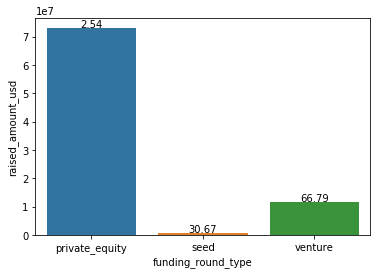

In [72]:
g= sns.barplot(x='funding_round_type', y='raised_amount_usd', data=m3)
for index, row in m3.iterrows():
    #Adding 100000 to provide gap between plot and text
    g.text(row.name, row.raised_amount_usd+100000, round(row.fraction,2), color='black', ha="center")

plt.show()

C:\Users\kritesh\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


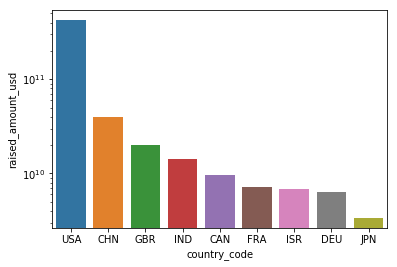

In [73]:
#Plot showing the top 9 countries against the total amount of investments of venture funding type.
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
plt.yscale('log')
plt.show()

In [74]:
#Plot showing the number of investments in the top 3 sectors of the top 3 countries
D1_Top_Three['Country']= 'USA'
D1_Top_Three= D1_Top_Three.head(3)

D2_Top_Three['Country']= 'GBR'
D2_Top_Three= D2_Top_Three.head(3)

D3_Top_Three['Country']= 'IND'
D3_Top_Three= D3_Top_Three.head(3)

D1_Top_Three_Final= D1_Top_Three.append(D2_Top_Three)
D1_Top_Three_Final= D1_Top_Three_Final.append(D3_Top_Three)

D1_Top_Three_Final

,main_sector,counts,Country
6,Others,2950,USA
7,"Social, Finance, Analytics, Advertising",2714,USA
1,Cleantech / Semiconductors,2300,USA
6,Others,147,GBR
7,"Social, Finance, Analytics, Advertising",133,GBR
1,Cleantech / Semiconductors,128,GBR
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
5,"News, Search and Messaging",52,IND


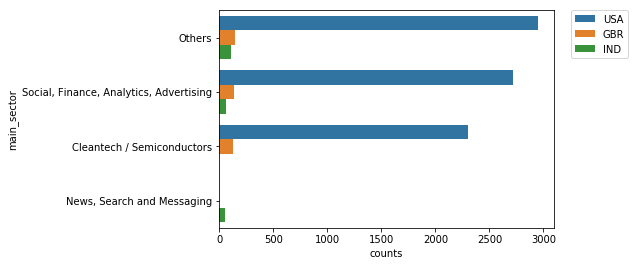

In [75]:
sns.barplot(x="counts", y="main_sector", hue="Country", data=D1_Top_Three_Final)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()